## Pruebas de Hipótesis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### Funciones

Funciones de graficación

In [2]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Función para graficar distribución
def GraficarDistribucionPlotly(dataframe, filas_columnas, alto, ancho, nbinsx=10):
    fig = make_subplots(rows=filas_columnas, cols=filas_columnas, subplot_titles=dataframe.columns)

    for i, col in enumerate(dataframe.columns):
        ax = i//filas_columnas + 1
        ay = i%filas_columnas + 1
        fig.add_trace(go.Histogram(x=dataframe[col], nbinsx=nbinsx, name=col), ax, ay)
        
    fig.update_layout(title='Histogramas de cada columna', height=alto, width=ancho, showlegend=False)
    
    return fig.show()

# Función para crear un mapa de calor
def MapaCalor(dataframe, alto, ancho):
    fig = go.Figure(data=go.Heatmap(z=dataframe.corr(), x=dataframe.columns, y=dataframe.columns))
    fig.update_layout(title='Mapa de calor', height=alto, width=ancho)
    return fig.show()

Función para conocer la media, desviación estándar y rango de valores de un atributo

In [3]:
def data_summary(df):
    summary = pd.DataFrame()
    summary['Media'] = df.mean()
    summary['Desviación Estándar'] = df.std()
    summary["Varianza"] = df.var()
    return summary


#### Cargar  y examinar dataset

In [4]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
print("Número de instancias: ", df.shape[0])
df.head(5)

Número de instancias:  1462


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Revisar valores faltantes

In [5]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Media y desviación estándar de cada atributo

In [6]:
data_summary(df.iloc[:,1:])

,Media,Desviación Estándar,Varianza
meantemp,25.495521,7.348103,53.994614
humidity,60.771702,16.769652,281.221237
wind_speed,6.802209,4.561602,20.808214
meanpressure,1011.104548,180.231668,32483.454272


Máximos y mínimos de cada atributo

In [7]:
for col in df.iloc[:,1:].columns:
    print(col, ": ", (df[col].min(), df[col].max()))

meantemp :  (6.0, 38.71428571428572)
humidity :  (13.428571428571429, 100.0)
wind_speed :  (0.0, 42.22)
meanpressure :  (-3.0416666666666665, 7679.333333333333)


Histogramas por atributo

In [8]:
GraficarDistribucionPlotly(df.iloc[:,1:], 2, 500, 500, nbinsx=10)

Series Temporales

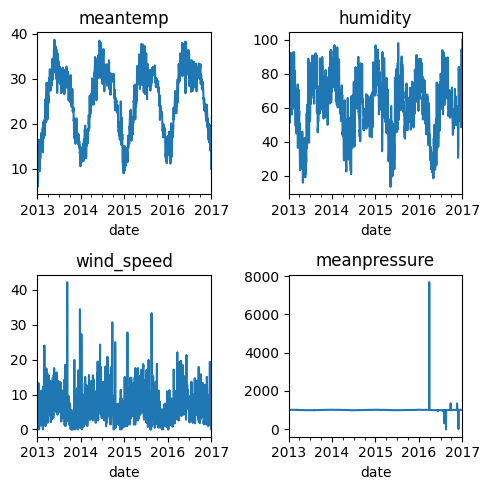

In [9]:
df_copia = df.copy()
df_copia['date'] = pd.to_datetime(df_copia['date'])  # Asegurándonos de que la columna date es de tipo datetime
df_copia.set_index('date', inplace=True)  # Establecemos la columna date como índice

# Creamos la figura y el objeto ax de matplotlib
fig, axs = plt.subplots(2, 2, figsize=(5,5))

# Aplanamos el array de subgráficos para poder iterar sobre él
axs = axs.flatten()

# Graficamos cada serie temporal en su propio subgráfico
for i, columna in enumerate(df_copia.columns):
    df_copia[columna].plot(ax=axs[i], title=columna)

# Mostramos la gráfica
plt.tight_layout()
plt.show()

### Pruebas de normalidad

#### 1. Prueba Shapiro-Wilk

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p>0.05:
    print("Probablemente Gaussiana")
else:
    print("Probablemente No Gaussiana")

stat=0.985, p=0.000
Probablemente No Gaussiana


#### 2. Prueba $K^2$ de D'Agostino's

In [11]:
from scipy.stats import normaltest

stat, p = normaltest(df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente Gaussiana')
else:
    print('Probablemente no Gaussiana')

stat=35.517, p=0.000
Probablemente no Gaussiana


#### 3. Prueba de Anderson-Darling

In [12]:
from scipy.stats import anderson

result = anderson(df["humidity"])

print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
if result.statistic < cv:
    print('Probablemente Gaussiana al %.1f%% ' % (sl))
else:
    print('Probablemente no Gaussiana al %.1f%% ' % (sl))

stat=5.562
Probablemente no Gaussiana al 1.0% 


### Pruebas de Correlación

#### 4. Prueba de correlación de Pearson

In [13]:
from scipy.stats import pearsonr

stat, p = pearsonr(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente independiente')
else:
    print('Probablemente dependiente')

stat=-0.572, p=0.000
Probablemente dependiente


#### 5. Correlación de rango de Spearman's

In [14]:
from scipy.stats import spearmanr

stat, p = spearmanr(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente independiente')
else:
    print('Probablemente dependiente')

stat=-0.576, p=0.000
Probablemente dependiente


#### 6. Correlación de rangos de Kendall

In [15]:
from scipy.stats import kendalltau

stat, p = kendalltau(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente independiente')
else:
    print('Probablemente dependiente')

stat=-0.411, p=0.000
Probablemente dependiente


#### 7. Prueba Chi-Cuadrado

Leer un dataset con variables categóricas

In [16]:
df2 = pd.read_csv("Salary_Data.csv")
df2.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Tabla de contingencia

In [17]:
tabla_contingencia = pd.crosstab(df2['Gender'], df2['Job Title'])

print(tabla_contingencia)


Job Title  Account Manager  Accountant  Administrative Assistant  \
Gender                                                             
Female                   0           1                         2   
Male                     1           0                         0   
Other                    0           0                         0   

Job Title  Back end Developer  Business Analyst  Business Development Manager  \
Gender                                                                          
Female                     65                 1                             0   
Male                      177                 1                             1   
Other                       2                 0                             0   

Job Title  Business Intelligence Analyst  CEO  Chief Data Officer  \
Gender                                                              
Female                                 0    0                   0   
Male                                   1    1 

Chi Cuadrado

In [18]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(tabla_contingencia)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente independiente')
else:
    print('Probablemente dependiente')

stat=1536.325, p=0.000
Probablemente dependiente


### Pruebas de estacionariedad

#### 8. Prueba de raíz unitaria aumentada Dickey-Fuller

In [19]:
from statsmodels.tsa.stattools import kpss

stat, p, lags, crit = kpss(df["meantemp"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente estacionaria')
else:
    print("Probablemente no estacionaria")

stat=0.188, p=0.100
Probablemente estacionaria


C:\Users\USER\AppData\Local\Temp\ipykernel_12040\4240832465.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




#### 9. Kwiatkowski-Phillips-Schmidt-Shin

In [20]:
from statsmodels.tsa.stattools import kpss

stat, p, lags, crit = kpss(df["meantemp"])

print('stat=%.3f, p=%.3f' % (stat, p))
print(f'Valores críticos: {crit}')

if p < 0.05:
    print('La serie temporal probablemente no es estacionaria')
else:
    print('La serie temporal probablemente es estacionaria')


stat=0.188, p=0.100
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La serie temporal probablemente es estacionaria


C:\Users\USER\AppData\Local\Temp\ipykernel_12040\1682664094.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Pruebas de hipótesis estadísticas paramétricas

#### 10. Prueba t de Student

In [21]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("Probablemente la misma distribución")
else:
    print("Probablemente diferente distribución")

stat=-73.670, p=0.000
Probablemente diferente distribución


#### 11. Prueba de t de Student emparejada

In [22]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente la misma distribución')
else:
    print('Probablemente diferente distribución')

stat=-61.812, p=0.000
Probablemente diferente distribución


#### 12. Prueba de Análisis de Varianza (ANOVA)

In [23]:
from scipy.stats import f_oneway

stat, p = f_oneway(df["meantemp"], df["humidity"], df["wind_speed"], df["meanpressure"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente la misma distribución')
else:
    print('Probablemente diferente distribución')

stat=42852.883, p=0.000
Probablemente diferente distribución


### Pruebas de hipótesis estadísticas no paramétricas

#### 13. Prueba de U de Mann-Whitney

In [24]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente es la misma distribución')
else:
    print('Probablemente es diferente distribución')

stat=86147.000, p=0.000
Probablemente es diferente distribución


#### 14. Prueba de rangos con signo de Wilcoxon

In [25]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente es la misma distribución')
else:
    print('Probablemente es diferente distribución')

stat=14236.500, p=0.000
Probablemente es diferente distribución


#### 15. Prueba H de Kruskal-Wallis

In [26]:
from scipy.stats import kruskal

stat, p = kruskal(df["meantemp"], df["humidity"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente es la misma distribución')
else:
    print('Probablemente es diferente distribución')

stat=1853.077, p=0.000
Probablemente es diferente distribución


#### 16. Prueba de Friedman

In [27]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(df["meantemp"], df["humidity"], df["wind_speed"], df["meanpressure"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablemente es la misma distribución')
else:
    print('Probablemente es diferente distribución')

stat=4239.155, p=0.000
Probablemente es diferente distribución
